In [1]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker

from cartopy.util import add_cyclic_point

In [2]:
data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/observation/chirps/chirps-v2.0.monthly.nc')
 

data

<xarray.Dataset>
Dimensions:    (latitude: 2000, longitude: 7200, time: 496)
Coordinates:
  * latitude   (latitude) float32 -49.97 -49.92 -49.88 ... 49.87 49.92 49.97
  * longitude  (longitude) float32 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * time       (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2022-04-01
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2022-05-16
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [3]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1981-01-16T12:00:00.000000000','2005-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:    (latitude: 2000, longitude: 7200, time: 299)
Coordinates:
  * latitude   (latitude) float32 -49.97 -49.92 -49.88 ... 49.87 49.92 49.97
  * longitude  (longitude) float32 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * time       (time) datetime64[ns] 1981-02-01 1981-03-01 ... 2005-12-01
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2022-05-16
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [4]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:    (latitude: 2000, longitude: 7200, time: 100)
Coordinates:
  * latitude   (latitude) float32 -49.97 -49.92 -49.88 ... 49.87 49.92 49.97
  * longitude  (longitude) float32 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * time       (time) datetime64[ns] 1981-06-01 1981-07-01 ... 2005-09-01
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2022-05-16
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [5]:
#for i in data.latitude.values:
 #   print(i)

In [6]:
#for i in data.longitude.values:
 #   print(i)

In [7]:
#to select the x and y coordinates
jjas_data = jjas_data.sel(longitude=slice(86,94),latitude=slice(18,28))
jjas_data

<xarray.Dataset>
Dimensions:    (latitude: 200, longitude: 160, time: 100)
Coordinates:
  * latitude   (latitude) float32 18.02 18.07 18.12 18.17 ... 27.88 27.92 27.97
  * longitude  (longitude) float32 86.02 86.08 86.12 86.17 ... 93.88 93.92 93.98
  * time       (time) datetime64[ns] 1981-06-01 1981-07-01 ... 2005-09-01
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2022-05-16
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [8]:
#interpolating to low resolution 
new_lon=np.arange(86.125,94,0.25)
new_lat=np.arange(18.125,28,.25)
jjas_data = jjas_data.interp(longitude=new_lon,latitude=new_lat)
jjas_data

<xarray.Dataset>
Dimensions:    (time: 100, latitude: 40, longitude: 32)
Coordinates:
  * time       (time) datetime64[ns] 1981-06-01 1981-07-01 ... 2005-09-01
  * longitude  (longitude) float64 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88
  * latitude   (latitude) float64 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88
Data variables:
    precip     (time, latitude, longitude) float64 nan nan nan ... 230.4 188.8
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2022-05-16
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [9]:
#getting the mean for JJAS data
jjas_mean = jjas_data.precip.mean('time')
 
jjas_mean

<xarray.DataArray 'precip' (latitude: 40, longitude: 32)>
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [248.97755746, 275.25243237, 338.84412051, ..., 204.03614269,
        273.31148617, 398.09106593],
       [313.03271648, 304.99211103, 340.83162938, ..., 159.18378847,
        245.99790446, 286.82859665],
       [300.33862553, 273.78465937, 231.7827732 , ..., 220.4120115 ,
        251.78057764, 284.67563868]])
Coordinates:
  * longitude  (longitude) float64 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88
  * latitude   (latitude) float64 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88

In [10]:
#changing unit from mm/month to mm/day
pr_mm = jjas_mean/30.4167
pr_mm


chirps = pr_mm

In [11]:
#opening miroc5 data

data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/regcm driven by gcm/ensemble-average/regcmensble_remap1.nc')

data

<xarray.Dataset>
Dimensions:    (time: 432, bnds: 2, longitude: 32, latitude: 40)
Coordinates:
  * time       (time) object 1970-01-16 12:00:00 ... 2005-12-16 12:00:00
  * longitude  (longitude) float32 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88
  * latitude   (latitude) float32 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    pr         (time, latitude, longitude) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Fri Jul 22 11:32:44 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment:                              MIROC-MIROC5, historical...
    driving_model_id:                                MIROC-MIROC5
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [12]:
#changing time dim to datetime64[ns] dtype

datetimeindex = data.indexes['time'].to_datetimeindex()
data['time']=datetimeindex
data

/home/mkibria/miniconda3/envs/esp-sp/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]
/tmp/ipykernel_9970/1463838701.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = data.indexes['time'].to_datetimeindex()


<xarray.Dataset>
Dimensions:    (time: 432, bnds: 2, longitude: 32, latitude: 40)
Coordinates:
  * time       (time) datetime64[ns] 1970-01-16T12:00:00 ... 2005-12-16T12:00:00
  * longitude  (longitude) float32 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88
  * latitude   (latitude) float32 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1970-01-01 00:00:00 ... 2006-01-01 00:00:00
    pr         (time, latitude, longitude) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Fri Jul 22 11:32:44 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment:                              MIROC-MIROC5, historical...
    driving_model_id:                                MIROC-MIROC5
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [13]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1981-01-16T12:00:00.000000000','2005-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:    (time: 299, bnds: 2, longitude: 32, latitude: 40)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-16T12:00:00 ... 2005-11-16
  * longitude  (longitude) float32 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88
  * latitude   (latitude) float32 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1981-01-01 00:00:00 ... 2005-12-01 00:00:00
    pr         (time, latitude, longitude) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Fri Jul 22 11:32:44 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment:                              MIROC-MIROC5, historical...
    driving_model_id:                                MIROC-MIROC5
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [14]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:    (time: 100, bnds: 2, longitude: 32, latitude: 40)
Coordinates:
  * time       (time) datetime64[ns] 1981-06-16 ... 2005-09-16
  * longitude  (longitude) float32 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88
  * latitude   (latitude) float32 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1981-06-01 00:00:00 ... 2005-10-01 00:00:00
    pr         (time, latitude, longitude) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Fri Jul 22 11:32:44 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    experiment_id:                                   historical
    driving_experiment:                              MIROC-MIROC5, historical...
    driving_model_id:                                MIROC-MIROC5
    driving_experiment_name:                         historical
    model_id:                                        ICTP-RegCM4-7
    CDO:                                             Climate Data Operators v...

In [15]:
#jjas_data.x.values
#jjas_data.y.values


In [16]:
#getting the mean for JJAS data
jjas_mean = jjas_data.pr.mean('time')
 
jjas_mean

<xarray.DataArray 'pr' (latitude: 40, longitude: 32)>
array([[3.9603128e-05, 4.0292754e-05, 4.1846084e-05, ..., 7.1517825e-05,
        6.6991641e-05, 7.0500530e-05],
       [3.8418944e-05, 3.9147384e-05, 3.9580678e-05, ..., 7.5560907e-05,
        7.3236130e-05, 7.1829920e-05],
       [3.6612117e-05, 3.7486705e-05, 3.7657341e-05, ..., 8.5610365e-05,
        8.1372018e-05, 8.5974789e-05],
       ...,
       [1.8407845e-04, 2.0547943e-04, 2.2842888e-04, ..., 2.0595801e-04,
        2.1437595e-04, 1.8386221e-04],
       [1.8978299e-04, 2.1626672e-04, 2.6339813e-04, ..., 1.8772749e-04,
        2.3271758e-04, 2.4781871e-04],
       [1.9796759e-04, 3.2225845e-04, 5.0131447e-04, ..., 1.8953896e-04,
        2.5643263e-04, 3.0891492e-04]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88
  * latitude   (latitude) float32 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88

In [17]:
eraint = jjas_mean*86400
eraint

<xarray.DataArray 'pr' (latitude: 40, longitude: 32)>
array([[ 3.42171028,  3.48129398,  3.61550166, ...,  6.17914007,
         5.78807776,  6.09124575],
       [ 3.31939679,  3.38233399,  3.4197706 , ...,  6.52846238,
         6.32760159,  6.20610507],
       [ 3.16328688,  3.23885131,  3.25359424, ...,  7.39673555,
         7.03054236,  7.42822175],
       ...,
       [15.90437838, 17.75342287, 19.7362551 , ..., 17.79477247,
        18.52208194, 15.88569512],
       [16.39725063, 18.68544482, 22.75759885, ..., 16.21965528,
        20.1067985 , 21.41153645],
       [17.10439953, 27.84313001, 43.31357013, ..., 16.37616595,
        22.15577904, 26.69024952]])
Coordinates:
  * longitude  (longitude) float32 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88
  * latitude   (latitude) float32 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88

In [18]:
bias = eraint - chirps
bias

<xarray.DataArray (latitude: 40, longitude: 32)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [ 7.71882382,  8.70403775,  8.59618663, ..., 11.08674225,
         9.53650868,  2.797784  ],
       [ 6.10577534,  8.65831791, 11.5521877 , ..., 10.9862214 ,
        12.01920503, 11.98156552],
       [ 7.23026376, 18.84200039, 35.69332293, ...,  9.1297516 ,
        13.87807049, 17.33106069]])
Coordinates:
  * longitude  (longitude) float32 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88
  * latitude   (latitude) float32 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88

In [19]:
bias_percentage = ((eraint - chirps)/chirps)*100
bias_percentage


<xarray.DataArray (latitude: 40, longitude: 32)>
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [ 94.29811698,  96.18374764,  77.16457632, ..., 165.27567551,
        106.13133306,  21.37685671],
       [ 59.32847494,  86.34894111, 103.09472399, ..., 209.923764  ,
        148.6128731 , 127.05835062],
       [ 73.22426919, 209.32928618, 468.40111563, ..., 125.98991931,
        167.65594499, 185.17695307]])
Coordinates:
  * longitude  (longitude) float32 86.12 86.38 86.62 86.88 ... 93.38 93.62 93.88
  * latitude   (latitude) float32 18.12 18.38 18.62 18.88 ... 27.38 27.62 27.88

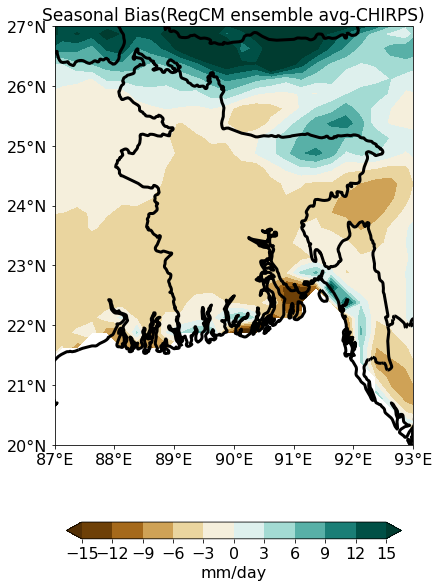

In [23]:
# Plotting annual_pr_mean

#plotting with cartopy
import cartopy.feature as cfeature

plt.rcParams['font.size'] = '16'

fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(bias['longitude'], bias['latitude'],bias[:,:],
                levels=np.arange(-15,15+3,3),  transform = ccrs.PlateCarree(),cmap='BrBG',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1,ticks=np.arange(-15,15+3,3), orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)



plt.title('Seasonal Bias(RegCM ensemble avg-CHIRPS)',fontsize=17)
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/Seasonal Bias(regcm ensemble avg-chirps).png")



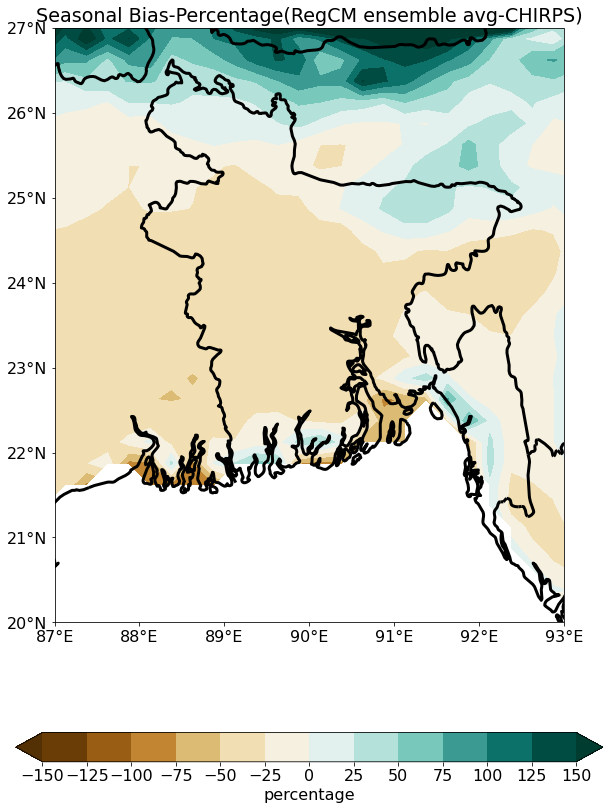

In [24]:
# Plotting bias percentage 

#plotting with cartopy
import cartopy.feature as cfeature
from matplotlib import ticker, cm


fig = plt.figure(figsize=(16,13.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(bias_percentage['longitude'], bias_percentage['latitude'],bias_percentage[:,:],
                  levels=np.arange(-150,150+25,25),transform = ccrs.PlateCarree(),
                    cmap='BrBG',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1,ticks=np.arange(-150,150+25,25),orientation = 'horizontal',shrink=0.7, fraction = .04 , label = 'percentage')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)


plt.title('Seasonal Bias-Percentage(RegCM ensemble avg-CHIRPS)')
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/Seasonal Bias_percentage(regcm ensemble avg-chirps).png")







In [22]:
#cma colors
'''Colormap CET_D1A is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, 
BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens,
Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, 
Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy,
RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, 
Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn,
autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, 
copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat,
gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r,
gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma,
magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, 
seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, 
ter'''

'Colormap CET_D1A is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, \nBrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens,\nGreens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, \nPastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy,\nRdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, \nSpectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn,\nautumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, \ncopper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat,\ngist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r